<a href="https://colab.research.google.com/github/may0we/SHG_Booking_Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score, recall_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('loan_data.csv')

data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
# encode the categorical variables

categorical_columns = list(data.select_dtypes(include='object').columns)
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [ ]:
# split the dataset

X = data.drop(columns=['loan_status'])
y = data['loan_status']

# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,
                                                  random_state=23, stratify=y)

In [ ]:
# Scale the dataset

scaler = RobustScaler()
columns = X_train.columns
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# convert to dataframe
X_train = pd.DataFrame(data=X_train, columns=columns)
X_test = pd.DataFrame(data=X_test, columns=columns)

## Model Training

In [ ]:
model = LogisticRegression() #init the model
model.fit(X_train, y_train)
train_preds = model.predict(X_train) # get train prediction
test_preds = model.predict(X_test) # get test prediction

## Evaluation

Text(1067.7705176767674, 0.5, 'Prediction')

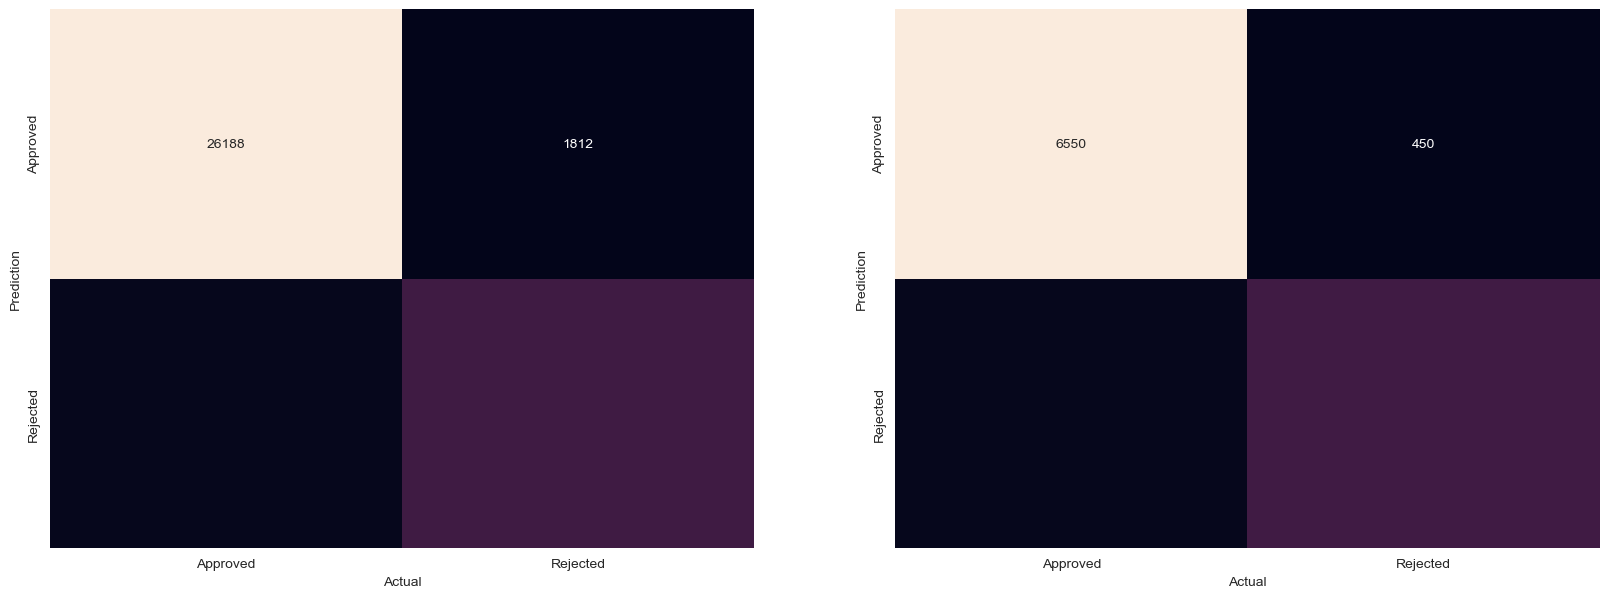

In [ ]:
cols = ['Approved', 'Rejected']
conf_train = pd.DataFrame(data = confusion_matrix(y_train, train_preds),
                          columns=cols,index=cols)
conf_test = pd.DataFrame(data= confusion_matrix(y_test, test_preds),
                         columns=cols, index=cols)

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 7))
sns.heatmap(data=conf_train, ax=axes[0],cbar=False, annot=True, fmt='d')
sns.heatmap(data=conf_test, ax=axes[1], cbar=False, annot=True, fmt='d')

axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Prediction')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Prediction')

In [ ]:
5881/(5881+1812)

0.7644611984921357

In [ ]:
train_classification = classification_report(y_train, train_preds)
test_classification = classification_report(y_test, test_preds)

print(f'train classification: \n {train_classification}')
print(f'test classification: \n {test_classification}')

train classification: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     28000
           1       0.76      0.74      0.75      8000

    accuracy                           0.89     36000
   macro avg       0.84      0.84      0.84     36000
weighted avg       0.89      0.89      0.89     36000

test classification: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.77      0.74      0.75      2000

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000

